Before Cleaning:
Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

After Cleaning:
Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64


/tmp/ipython-input-79056122.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price Per Unit'].fillna(df['Price Per Unit'].mean(), inplace=True)
/tmp/ipython-input-79056122.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

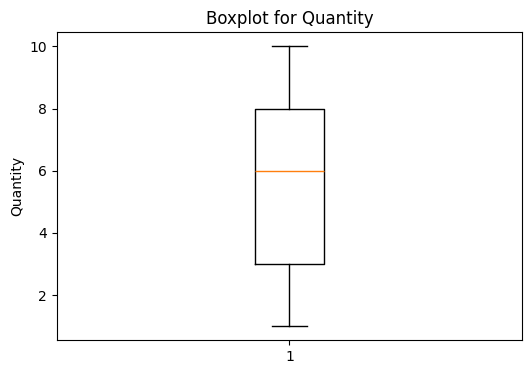


Outliers detected:
Empty DataFrame
Columns: [Transaction ID, Customer ID, Category, Item, Price Per Unit, Quantity, Total Spent, Payment Method, Location, Transaction Date, Discount Applied]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
df = pd.read_csv("/content/retail_store_sales.csv")
print("Before Cleaning:")
print(df.isnull().sum())
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Price Per Unit'].fillna(df['Price Per Unit'].mean(), inplace=True)
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Total Spent'].fillna(df['Total Spent'].mean(), inplace=True)
df['Item'].fillna(df['Item'].mode()[0], inplace=True)
df['Discount Applied'].fillna('False', inplace=True)
print("\nAfter Cleaning:")
print(df.isnull().sum())
plt.figure(figsize=(6,4))
plt.boxplot(df['Quantity'])
plt.title("Boxplot for Quantity")
plt.ylabel("Quantity")
plt.show()
z = np.abs(stats.zscore(df['Quantity']))
outliers = df[z > 3]
print("\nOutliers detected:")
print(outliers)